In [1]:
%matplotlib notebook

In [2]:
# import dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

In [3]:
# Read two cleaned csv files saved
jobs_df=pd.read_csv("Coordinates.csv")
jobs_df2=pd.read_csv("glassdoor_salaries.csv")

jobs_df.drop(columns="Unnamed: 0")

# Consolidate to required information
salary_df=jobs_df[["Job Title", "Sector", "salary_average", "State"]]
salary_df2=jobs_df2['Salary Estimate']

# Joining information from two datasets from the same source
df=salary_df.join(salary_df2, how='outer')
df.head()

,Job Title,Sector,salary_average,State,Salary Estimate
0,data scientist,Business Services,84500,NY,$77K-$92K (Glassdoor Est.)
1,data scientist,Business Services,84500,VA,$77K-$92K (Glassdoor Est.)
2,data scientist,Biotech & Pharmaceuticals,84500,MA,$77K-$92K (Glassdoor Est.)
3,data scientist,Healthcare,84500,KS,$77K-$92K (Glassdoor Est.)
4,data scientist,Government,84500,CA,$77K-$92K (Glassdoor Est.)


In [4]:
# Cleaning up Salary estimate and salary_average column
df['Salary Estimate'] = df['Salary Estimate'].map(lambda x: x.rstrip('(Glassdoor Est.)'))
df = df[df['salary_average'] != 0 ]

# sort the dataframe
df = df.sort_values(by='salary_average', ascending=True)
new_df = df.reset_index(drop=True)

new_df.head()

,Job Title,Sector,salary_average,State,Salary Estimate
0,data scientist,Business Services,41600,WA,$ 17-$ 23 Per Hou
1,senior data scientist,Information Technology,41600,CA,$ 17-$ 23 Per Hou
2,senior data scientist,Insurance,41600,CA,$ 17-$ 23 Per Hou
3,senior data scientist,Information Technology,41600,NC,$ 17-$ 23 Per Hou
4,senior data scientist,Healthcare,41600,WI,$ 17-$ 23 Per Hou


In [5]:
# Identifying unique salary estimates
new_df["salary_average"].unique()

bins = [40000, 75000, 100000, 125000, 150000, 200000]
labels = ['40k-75k', '76k-100k', '101k-125K', '126K-150K','151k+']

new_df['Salary Group'] = pd.cut(new_df['salary_average'], bins=bins, labels=labels)
new_df=new_df[["Job Title", "Sector", "salary_average", "Salary Group"]]

sector_new_df = new_df[new_df['Sector'] !='-1' ]

sector_new_df["Sector"].unique()

sector = ['Business Services', 'Information Technology', 'Insurance',
       'Healthcare', 'Biotech & Pharmaceuticals', 'Finance']

sector_boxplot = sector_new_df.loc[sector_new_df["Sector"].isin(sector)]

# sector_new_df.head()
# sector_new_df.dtypes

<IPython.core.display.Javascript object>


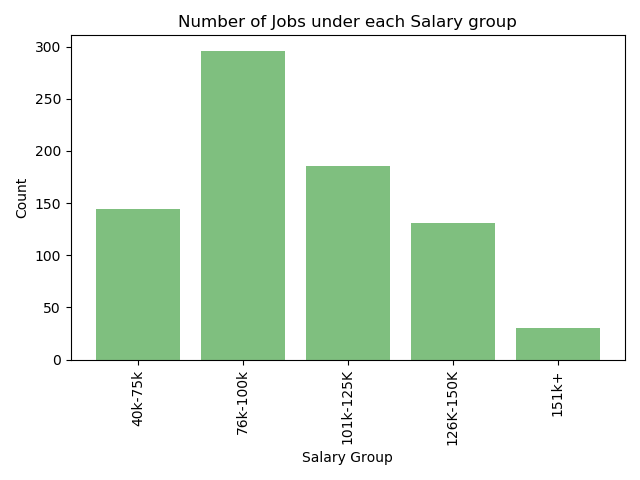

In [6]:
# Bar plot on all Job title
salary_group = sector_new_df.groupby("Salary Group")
count_jobtitles = salary_group["Job Title"].count()
jobtitle_count_df = pd.DataFrame({"Count": count_jobtitles}).reset_index()

group = jobtitle_count_df["Salary Group"]

plt.bar(group, jobtitle_count_df["Count"], color='g', alpha=0.5)
plt.xticks(rotation='vertical') 
plt.title("Number of Jobs under each Salary group")
plt.ylabel('Count')
plt.xlabel('Salary Group')
plt.tight_layout()

# plt.savefig("All job title distribution.png", bbox_inches = "tight")

<IPython.core.display.Javascript object>


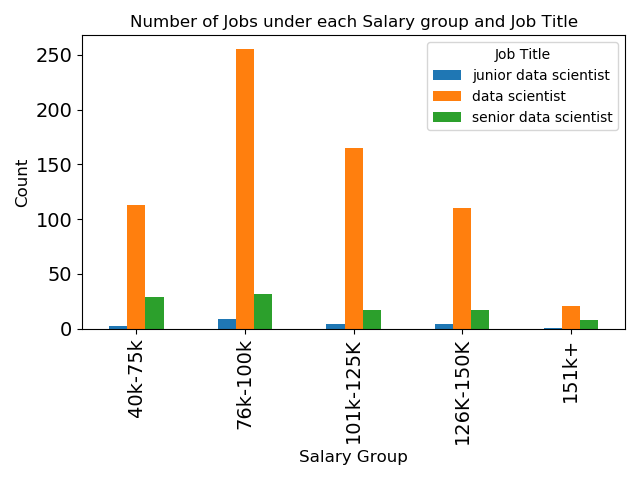

In [7]:
# Bar plot based on salary group and Job title
salary_group2 = sector_new_df.groupby(["Salary Group","Job Title"])
count_jobtitles2 = salary_group2["Job Title"].count()
jobtitle_count_df2 = pd.DataFrame({"Count": count_jobtitles2}).reset_index()
# jobtitle_count_df2.head()

salaryjob_matrix = jobtitle_count_df2.pivot(index='Salary Group', columns='Job Title', values='Count')
salaryjob_matrix

#group2 = jobtitle_count_df2["Salary Group"]

ax = salaryjob_matrix[['junior data scientist','data scientist','senior data scientist']].plot(kind='bar', 
                                                                                               title ="Number of Jobs under each Salary group and Job Title",
                                                                                               legend=True, fontsize=14, rot=90)
ax.set_xlabel("Salary Group", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
plt.tight_layout()
plt.show()

# plt.savefig("Number of jobs by job title and salary group.png", bbox_inches = "tight")

<IPython.core.display.Javascript object>


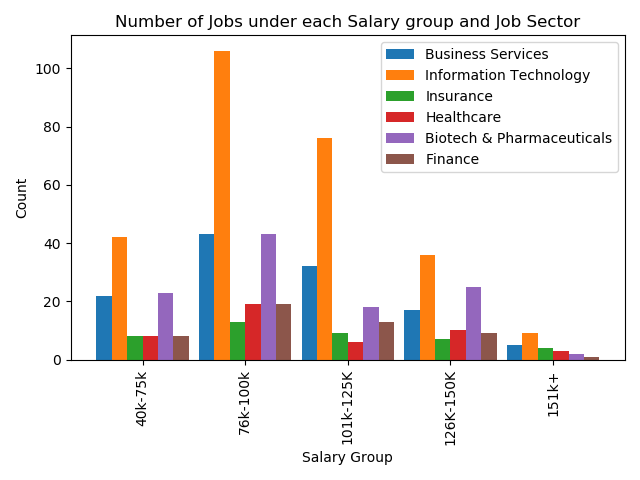

In [8]:
# Bar plot based on salary group and Job title
salary_group3 = sector_new_df.groupby(["Salary Group","Sector"])
count_jobtitles3 = salary_group3["Sector"].count()
jobtitle_count_df3 = pd.DataFrame({"Count": count_jobtitles3}).reset_index()

salaryjob_matrix2 = jobtitle_count_df3.pivot(index='Salary Group', columns='Sector', values='Count')

#group3 = jobtitle_count_df3["Salary Group"]

# ax2 = salaryjob_matrix2[['Business Services', 'Information Technology', 'Insurance',
#        'Healthcare', 'Biotech & Pharmaceuticals', 'Aerospace & Defence',
#        'Government', 'Manufacturing', 'Building, Repair & Maintenance',
#        'Education', 'Finance', 'Oil, Gas, Energy & Utilities', 'Retail',
#        'Telecommunications', 'Media', 'Consumer Services',
#        'Mining & Metals', 'Non-Profits', 'Real Estate',
#        'Agriculture & Forestry', 'Arts, Entertainment & Recreation',
#        'Accounting & Legal', 'Transportation & Logistics']].plot(kind='bar',
#                                                                  title ="Number of Jobs under each Salary group and Job Sector",
#                                                                  legend=True, rot=90,align='center', width=0.8)

ax2 = salaryjob_matrix2[['Business Services', 'Information Technology', 'Insurance',
       'Healthcare', 'Biotech & Pharmaceuticals', 'Finance']].plot(kind='bar',
                                                                 title ="Number of Jobs under each Salary group and Job Sector",
                                                                 legend=True, rot=90,align='center', width=0.9)

ax2.set_xlabel("Salary Group")
ax2.set_ylabel("Count")
#plt.xlim(-0.3,5.3)
plt.legend(bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()

# plt.savefig("Number of jobs by job sector and salary group.png", bbox_inches = "tight")

<IPython.core.display.Javascript object>


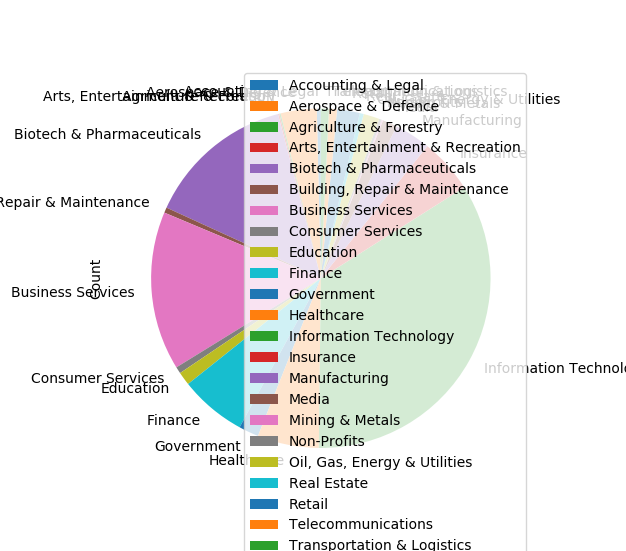

In [42]:
# labels = top_15['skill']
# sizes = top_15['TOTAL'] / top_15['TOTAL'].sum() * 100
# cs=cm.terrain(np.arange(20)/20.)
# explode = (0.1, 0,0,0,0,0,0,0,0,0,0,0,0,0,0)  
# patches, texts = plt.pie(sizes, colors = cs, explode=explode, shadow=True, startangle=90)

# plt.legend( loc = 'upper left', bbox_to_anchor=(0.85,1.025), labels=['%s, %1.1f %%' % (l, s) for l, s in zip(labels, sizes)])
# plt.axis('equal')

salary_group4 = sector_new_df.groupby(["Sector"])
sector_job = salary_group4["Sector"].count()

tot_jobs = len(sector_new_df["Job Title"])

count_df4 = pd.DataFrame({"Count": sector_job}).reset_index()
count_df4["Percentage"] = round(count_df4["Count"]/tot_jobs*100,1)

count_df4.plot(kind='pie', y='Count', figsize=(5, 5), labels=count_df4["Sector"], startangle=90)


<IPython.core.display.Javascript object>


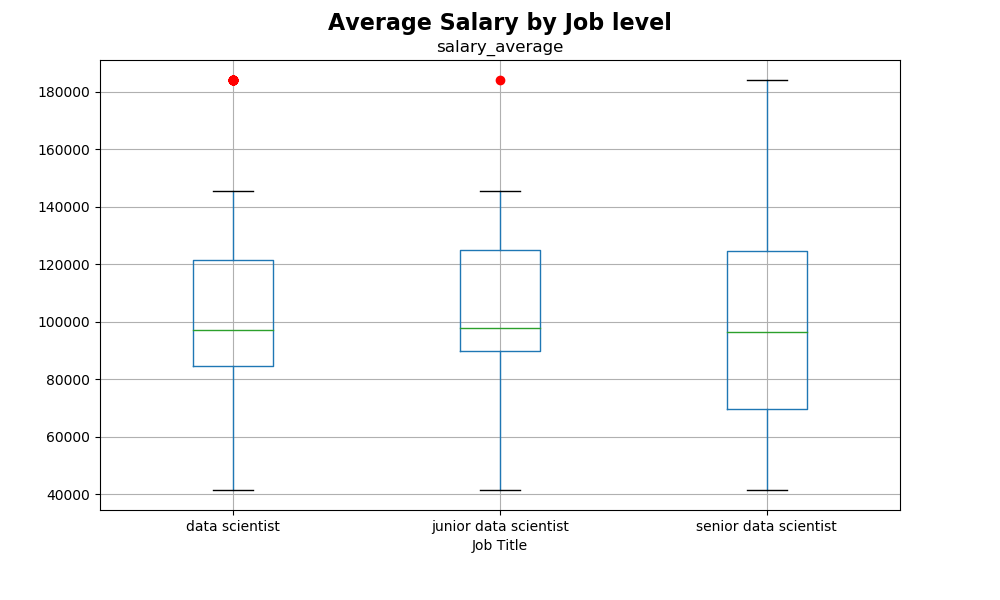

In [10]:
# boxplot to compare job title by salary averages
# import warnings
# warnings.filterwarnings('ignore')

sector_new_df.boxplot("salary_average", by="Job Title", figsize=(10,6), sym='ro')
plt.suptitle("Average Salary by Job level", fontsize=16, fontweight="bold")
plt.savefig("Boxplot Average Salary by Job level.png", bbox_inches = "tight")

<IPython.core.display.Javascript object>


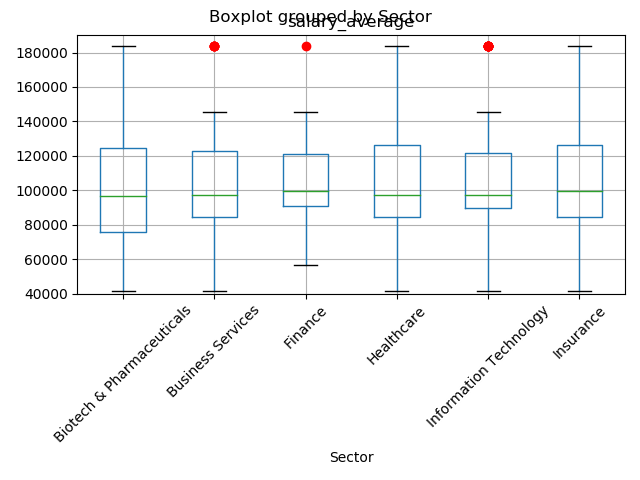

In [19]:
sector_boxplot.boxplot('salary_average', by="Sector", sym='ro', rot=45)
#plt.suptitle("Average Salary by Sector")
plt.ylim(40000,190000)
#plt.yticks(np.arange(0, 190000, 50000))
plt.tight_layout()
plt.savefig("Boxplot Average Salary by Sector.png", bbox_inches = "tight")

In [12]:
# Extract individual groups by Job title
group1_jr = sector_new_df[sector_new_df["Job Title"] == "junior data scientist"]["salary_average"]
group2_m = sector_new_df[sector_new_df["Job Title"] == "data scientist"]["salary_average"]
group3_sr = sector_new_df[sector_new_df["Job Title"] == "senior data scientist"]["salary_average"]

In [13]:
# Perform the ANOVA
st.f_oneway(group1_jr, group2_m, group3_sr)

F_onewayResult(statistic=0.33658387357721387, pvalue=0.7143091298691913)

In [14]:
# Extract individual groups by Sector

group1 = sector_new_df[sector_new_df["Sector"] == "Business Services"]["salary_average"]
group2 = sector_new_df[sector_new_df["Sector"] == "Information Technology"]["salary_average"]
group3 = sector_new_df[sector_new_df["Sector"] == "Insurance"]["salary_average"]
group4 = sector_new_df[sector_new_df["Sector"] == "Healthcare"]["salary_average"]
group5 = sector_new_df[sector_new_df["Sector"] == "Biotech & Pharmaceuticals"]["salary_average"]
#group6 = sector_new_df[sector_new_df["Sector"] == "Aerospace & Defence"]["salary_average"]
#group7 = sector_new_df[sector_new_df["Sector"] == "Government"]["salary_average"]
#group8 = sector_new_df[sector_new_df["Sector"] == "Manufacturing"]["salary_average"]
#group9 = sector_new_df[sector_new_df["Sector"] == "Building, Repair & Maintenance"]["salary_average"]
#group10 = sector_new_df[sector_new_df["Sector"] == "Education"]["salary_average"]

group11 = sector_new_df[sector_new_df["Sector"] == "Finance"]["salary_average"]
#group12 = sector_new_df[sector_new_df["Sector"] == "Oil, Gas, Energy & Utilities"]["salary_average"]
#group13 = sector_new_df[sector_new_df["Sector"] == "Retail"]["salary_average"]
#group14 = sector_new_df[sector_new_df["Sector"] == "Telecommunications"]["salary_average"]
#group15 = sector_new_df[sector_new_df["Sector"] == "Media"]["salary_average"]
#group16 = sector_new_df[sector_new_df["Sector"] == "Consumer Services"]["salary_average"]
#group17 = sector_new_df[sector_new_df["Sector"] == "Mining & Metals"]["salary_average"]
#group18 = sector_new_df[sector_new_df["Sector"] == "Non-Profits"]["salary_average"]
#group19 = sector_new_df[sector_new_df["Sector"] == "Real Estate"]["salary_average"]
#group20 = sector_new_df[sector_new_df["Sector"] == "Agriculture & Forestry"]["salary_average"]

#group21 = sector_new_df[sector_new_df["Sector"] == "Arts, Entertainment & Recreation"]["salary_average"]
#group22 = sector_new_df[sector_new_df["Sector"] == "Accounting & Legal"]["salary_average"]
#group23 = sector_new_df[sector_new_df["Sector"] == "Transportation & Logistics"]["salary_average"]


In [15]:
# Perform the ANOVA by sector
st.f_oneway(group1, group2, group3, group4, group5, group11)

F_onewayResult(statistic=0.39042121309464417, pvalue=0.8555105715324649)